# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [ ]:
!pip install xlrd

In [ ]:
import pandas as pd

df = pd.read_excel('cars(3).xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267
(40000, 50000]  43159.200000  30802.690000


<Axes: xlabel='Mileage'>

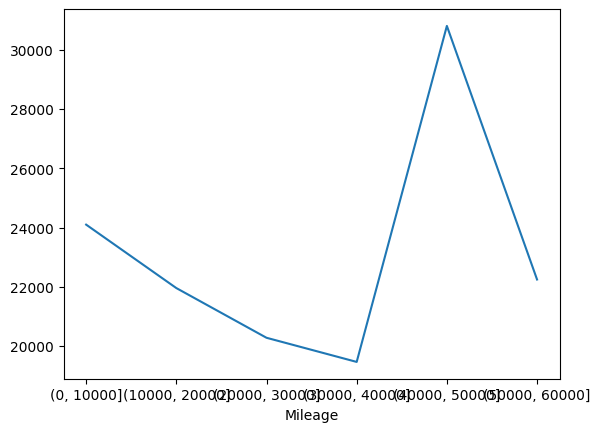

In [ ]:
#inspect the data and manipulate data
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']] #extract the mileage vs price relationship high milage effect the price
bins =  np.arange(0,70000,10000) #70k miles
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()#mean price and mileage
print(groups.head())
groups['Price'].plot.line()


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler #scaler to normalize the data
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

#pre-process the data
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# Add a constant column to our model so we can have a Y-intercept
X = sm.add_constant(X)

print (X)

est = sm.OLS(y, X).fit() #feature data

print(est.summary())

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.95e-77
Time:                        03:25:43   Log-Likelihood:                -8356.7
No. Observ

<ipython-input-15-6f03998dda5a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * cylinders + B3 * doors
    
In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [ ]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [ ]:
#2 Doors with 6 Cylinders
scaled = scale.transform([[50000, 6, 2]])#50k miles, 6 cylinders, 2 doors
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)
#predicted price 22k..

[ 1.          3.6829755   0.52741047 -1.7976593 ]
[22128.92513731]


## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

In [ ]:
#2 Doors with 2 Cylinders
scaled = scale.transform([[50000, 2, 2]])#50k miles, 2 cylinders, 2 doors
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)
#predicted price 60k..

[ 1.          3.6829755  -2.35720191 -1.7976593 ]
[6011.30570037]


In [ ]:
#4 Doors with 6 Cylinders
scaled = scale.transform([[60000, 6, 4]])#60k miles, 6 cylinders, 4 doors
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)
#predicted price 17k..

[1.         4.90379473 0.52741047 0.55627894]
[17269.39938815]


In [ ]:
#8 Doors with 12 Cylinders
scaled = scale.transform([[10000, 12, 8]])#10k miles, 12 cylinders, 8 doors
scaled = np.insert(scaled[0], 0, 1) #Need to add that constant column in again.
print(scaled)
predicted = est.predict(scaled)
print(predicted)
#predicted price 42k..

[ 1.         -1.20030142  4.85432905  5.2641554 ]
[42599.86755573]


The examples above were reasonable and the price decreases if there were 4 doors amd it runs 60k miles. The price of the vehicle depends on the number of factors like how many miles, cylinders, and doors needed. For example:

Based on the 8 doors with 12 cylinders, the price is 42k because it has 12 cylinders. However, the 2 doors with 2 cylinders are the most expensive due to the cost of doors and its cylinders.